# Importing Data

In [297]:
import pandas as pd

In [298]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [299]:
#sally punya drive
dt = pd.read_csv('/content/drive/MyDrive/Data anlytics/country_level_data.csv')
dt.head()

,iso3c,region_id,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,3.544708e+09,103187,8.813202e+04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,1.426650e+10,34656032,5.628525e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,1.070000e+11,25096150,4.213644e+06,51.8,6.7,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,1.891638e+10,2854191,1.087447e+06,51.4,4.5,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,AND,ECS,Andorra,HIC,3.352031e+09,82431,4.300000e+04,31.2,8.2,2.6,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN


In [300]:
# #irham punya drive
# dt = pd.read_csv('/content/drive/MyDrive/DA Project/country_level_data.csv')
# dt.head()

In [301]:
# #qis punya drive
# dt = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/country_level_data.csv')
# dt.head()

In [302]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 51 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   iso3c                                                                                  217 non-null    object 
 1   region_id                                                                              217 non-null    object 
 2   country_name                                                                           216 non-null    object 
 3   income_id                                                                              217 non-null    object 
 4   gdp                                                                                    216 non-null    float64
 5   population_population_number_of_people                                        

# **DATA CLEANING**

In [303]:
data = dt

In [304]:
#Check for null values
data.isnull().sum()

iso3c                                                                                      0
region_id                                                                                  0
country_name                                                                               1
income_id                                                                                  0
gdp                                                                                        1
population_population_number_of_people                                                     0
total_msw_total_msw_generated_tons_year                                                    2
composition_food_organic_waste_percent                                                    41
composition_glass_percent                                                                 46
composition_metal_percent                                                                 47
composition_other_percent                                             

In [305]:
data.isnull().sum().sum()

6208

In [306]:
# Define the new column names
new_column_names = {
    'iso3c': 'iso3c',
    'region_id': 'region_id',
    'country_name': 'country_name',
    'income_id': 'income_id',
    'gdp': 'gdp',
    'population_population_number_of_people': 'population',
    'total_msw_total_msw_generated_tons_year': 'total_msw_generated',
    'composition_food_organic_waste_percent': 'food_organic_waste_percent',
    'composition_glass_percent': 'glass_percent',
    'composition_metal_percent': 'metal_percent',
    'composition_other_percent': 'other_percent',
    'composition_paper_cardboard_percent': 'paper_cardboard_percent',
    'composition_plastic_percent': 'plastic_percent',
    'other_information_information_system_for_solid_waste_management': 'solid_waste_management_info_system',
    'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations': 'national_agency_enforcing_waste_laws',
    'other_information_national_law_governing_solid_waste_management_in_the_country': 'national_law_governing_solid_waste_management',
    'other_information_ppp_rules_and_regulations': 'ppp_rules_and_regulations',
    'other_information_summary_of_key_solid_waste_information_made_available_to_the_public': 'public_waste_info_summary',
    'special_waste_e_waste_tons_year': 'special_waste_e_waste_tons',
    'special_waste_hazardous_waste_tons_year': 'special_waste_hazardous_waste_tons',
    'waste_treatment_recycling_percent': 'waste_treatment_recycling_percent'
}

# Rename the columns
data = data.rename(columns=new_column_names)

In [307]:
main_features = ['iso3c',
                 'region_id', 'country_name', 'income_id',
                 'gdp', 'population', 'total_msw_generated']

numerical_features = ['food_organic_waste_percent',
            'glass_percent', 'metal_percent',
            'paper_cardboard_percent',
            'plastic_percent',
            'other_percent',
            'special_waste_e_waste_tons',
            'special_waste_hazardous_waste_tons',
            'waste_treatment_recycling_percent']

other_feature = ['solid_waste_management_info_system',
                 'national_agency_enforcing_waste_laws',
                 'national_law_governing_solid_waste_management',
                 'ppp_rules_and_regulations',
                 'public_waste_info_summary']

wantedFeatures = main_features + numerical_features + other_feature

In [308]:
#drop unwanted coulumns
data = data[wantedFeatures]

In [309]:
# Create the new feature 'population_category'
def categorize_population(population):
    if population < 1000000:
        return 'Small'
    elif 1000000 <= population < 10000000:
        return 'Medium'
    else:
        return 'Large'

data['population_category'] = data['population'].apply(categorize_population)
data['population_category'].value_counts()

population_category
Large     84
Medium    75
Small     58
Name: count, dtype: int64

In [310]:
main_features.insert(-1, 'population_category')

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   iso3c                                          217 non-null    object 
 1   region_id                                      217 non-null    object 
 2   country_name                                   216 non-null    object 
 3   income_id                                      217 non-null    object 
 4   gdp                                            216 non-null    float64
 5   population                                     217 non-null    int64  
 6   total_msw_generated                            215 non-null    float64
 7   food_organic_waste_percent                     176 non-null    float64
 8   glass_percent                                  171 non-null    float64
 9   metal_percent                                  170 non

In [312]:
data.isnull().sum().sum()

880

In [313]:
data.isnull().sum()

iso3c                                              0
region_id                                          0
country_name                                       1
income_id                                          0
gdp                                                1
population                                         0
total_msw_generated                                2
food_organic_waste_percent                        41
glass_percent                                     46
metal_percent                                     47
paper_cardboard_percent                           41
plastic_percent                                   42
other_percent                                     42
special_waste_e_waste_tons                        35
special_waste_hazardous_waste_tons                99
waste_treatment_recycling_percent                 93
solid_waste_management_info_system               109
national_agency_enforcing_waste_laws              54
national_law_governing_solid_waste_management 

## Filling in Null values for the main features


```
'iso3c', 'region_id', 'country_name', 'income_id', 'gdp', 'population', 'total_msw_generated'
```




In [314]:
#check for data where country is null
data.loc[data['country_name'].isnull(), main_features]

,iso3c,region_id,country_name,income_id,gdp,population,population_category,total_msw_generated
198,TWN,EAS,NaN,HIC,NaN,23434000,Large,7336000.0


In [315]:
#fill in the null value since only few missing values we can find from other data sources to manually fill in value
data.loc[data['iso3c'] == 'TWN', 'country_name'] = 'Taiwan'
data.loc[data['iso3c'] == 'TWN', 'gdp'] = 669250000000

In [316]:
data.loc[data['iso3c'] == 'TWN', main_features]

,iso3c,region_id,country_name,income_id,gdp,population,population_category,total_msw_generated
198,TWN,EAS,Taiwan,HIC,6.692500e+11,23434000,Large,7336000.0


In [317]:
data.loc[data['gdp'].isnull(), main_features]

,iso3c,region_id,country_name,income_id,gdp,population,population_category,total_msw_generated


In [318]:
# data.loc[data['iso3c'] == 'SXM', 'gdp'] = 1537000000

In [319]:
#check for data where total_msw_generated is null
data.loc[data['total_msw_generated'].isnull(), main_features]

,iso3c,region_id,country_name,income_id,gdp,population,population_category,total_msw_generated
183,SXM,LCN,Sint Maarten (Dutch part),HIC,1.537089e+09,37685,Small,NaN
186,TCA,LCN,Turks and Caicos Islands,HIC,1.138809e+09,34900,Small,NaN


In [320]:
data.loc[(data['region_id'] == 'LCN') & (data['income_id'] == 'HIC') & (data['population_category'] == 'Small'), main_features]

,iso3c,region_id,country_name,income_id,gdp,population,population_category,total_msw_generated
0,ABW,LCN,Aruba,HIC,3.544708e+09,103187,Small,88132.0167
9,ATG,LCN,Antigua and Barbuda,HIC,1.867733e+09,96777,Small,30585.0000
20,BHS,LCN,"Bahamas, The",HIC,1.289740e+10,386838,Small,264000.0000
27,BRB,LCN,Barbados,HIC,5.699950e+09,280601,Small,174815.4444
46,CUW,LCN,Curacao,HIC,3.075181e+09,153822,Small,24703.8132
47,CYM,LCN,Cayman Islands,HIC,6.844827e+09,59172,Small,60000.0000
104,KNA,LCN,St. Kitts and Nevis,HIC,9.656389e+08,54288,Small,32892.1400
119,MAF,LCN,St. Martin (French part),HIC,6.492063e+08,30959,Small,15479.5000
183,SXM,LCN,Sint Maarten (Dutch part),HIC,1.537089e+09,37685,Small,NaN
186,TCA,LCN,Turks and Caicos Islands,HIC,1.138809e+09,34900,Small,NaN


In [321]:
#get the average total_msw_generated for countries in similar region, income_id and population
temp = data.loc[(data['region_id'] == 'LCN') & (data['income_id'] == 'HIC') & (data['population_category'] == 'Small'), main_features]
mean = temp['total_msw_generated'].mean()

#replace null values with average
data.loc[data['total_msw_generated'].isnull(), 'total_msw_generated'] = mean

In [322]:
data['gdp_percapita'] = data['gdp'] / data['population']
data['total_msw_generated_percapita'] = data['total_msw_generated']/ data['population']

## Filling in Null values for the numerical_features


```
'food_organic_waste_percent', 'glass_percent', 'metal_percent',
'paper_cardboard_percent', 'plastic_percent', 'other_percent',
'special_waste_e_waste_tons', 'special_waste_hazardous_waste_tons',
'waste_treatment_recycling_percent'
```




In [323]:
region = data['region_id'].unique()
print(region)

['LCN' 'SAS' 'SSF' 'ECS' 'MEA' 'EAS' 'NAC']


* LCN: Latin America & Caribbean
* SAS: South Asia
* SSF: Sub-Saharan Africa
* ECS: Europe & Central Asia
* MEA: Middle East & North Africa
* EAS: East Asia & Pacific
* NAC: North America



In [324]:
income = data['income_id'].unique()
print(income)

['HIC' 'LIC' 'LMC' 'UMC']


* HIC: High-Income Countries
* LIC: Low-Income Countries
* LMC: Lower-Middle-Income Countries
* UMC: Upper-Middle-Income Countries

In [325]:
population = data['population_category'].unique()
print(population)

['Small' 'Large' 'Medium']


In [326]:
# filling with avg value from similar region/incomeid/population
for f in numerical_features:
  # print(f)
  for r in region:
    for i in income:
      for p in population:
        temp = data.loc[(data['region_id'] == r ) & (data['income_id'] == i ) & (data['population_category'] == p ), :]
        mean = temp[f].mean()
        if pd.isnull(mean):
          temp = data.loc[(data['region_id'] == r ) & (data['income_id'] == i ), :]
          mean = temp[f].mean()
          if pd.isnull(mean):
            temp = data.loc[data['region_id'] == r, :]
            mean = temp[f].mean()
        # print(f'\t{r} {i} {p} mean: {mean}')
        data.loc[(data[f].isnull()) & (data['region_id'] == r ) & (data['income_id'] == i ), f] = mean

In [327]:
# Recalculate composition persentage
data.loc[:,'other_percent'] = 100 - (
    data['food_organic_waste_percent'] +
    data['glass_percent'] +
    data['metal_percent'] +
    data['paper_cardboard_percent'] +
    data['plastic_percent']
)

Filling in Null values for the remaining features

In [328]:
for i in other_feature:
  print("\n")
  print(data[i].value_counts(dropna= False))



solid_waste_management_info_system
NaN    109
Yes     64
No      44
Name: count, dtype: int64


national_agency_enforcing_waste_laws
Yes    148
NaN     54
No      15
Name: count, dtype: int64


national_law_governing_solid_waste_management
Yes    176
NaN     23
No      17
yes      1
Name: count, dtype: int64


ppp_rules_and_regulations
Yes    116
NaN     59
No      42
Name: count, dtype: int64


public_waste_info_summary
NaN                                                                                                                 145
Yes                                                                                                                  59
No                                                                                                                   11
yes                                                                                                                   1
MNRE publishes monthly environmental newsletters informing the public about solid waste activ

In [329]:
data['national_law_governing_solid_waste_management'] = data['national_law_governing_solid_waste_management'].replace({'yes': 'Yes'})
data['public_waste_info_summary'] = data['public_waste_info_summary'].replace({'yes': 'Yes'})
data['public_waste_info_summary'] = data['public_waste_info_summary'].replace({'MNRE publishes monthly environmental newsletters informing the public about solid waste activities and projects.': 'Yes'})

In [330]:
for i in other_feature:
  data[i].fillna('Unknown', inplace=True)

In [331]:
for i in other_feature:
  print("\n")
  print(data[i].value_counts(dropna= False))



solid_waste_management_info_system
Unknown    109
Yes         64
No          44
Name: count, dtype: int64


national_agency_enforcing_waste_laws
Yes        148
Unknown     54
No          15
Name: count, dtype: int64


national_law_governing_solid_waste_management
Yes        177
Unknown     23
No          17
Name: count, dtype: int64


ppp_rules_and_regulations
Yes        116
Unknown     59
No          42
Name: count, dtype: int64


public_waste_info_summary
Unknown    145
Yes         61
No          11
Name: count, dtype: int64


In [332]:
data.isnull().sum()

iso3c                                            0
region_id                                        0
country_name                                     0
income_id                                        0
gdp                                              0
population                                       0
total_msw_generated                              0
food_organic_waste_percent                       0
glass_percent                                    0
metal_percent                                    0
paper_cardboard_percent                          0
plastic_percent                                  0
other_percent                                    0
special_waste_e_waste_tons                       0
special_waste_hazardous_waste_tons               0
waste_treatment_recycling_percent                0
solid_waste_management_info_system               0
national_agency_enforcing_waste_laws             0
national_law_governing_solid_waste_management    0
ppp_rules_and_regulations      

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   iso3c                                          217 non-null    object 
 1   region_id                                      217 non-null    object 
 2   country_name                                   217 non-null    object 
 3   income_id                                      217 non-null    object 
 4   gdp                                            217 non-null    float64
 5   population                                     217 non-null    int64  
 6   total_msw_generated                            217 non-null    float64
 7   food_organic_waste_percent                     217 non-null    float64
 8   glass_percent                                  217 non-null    float64
 9   metal_percent                                  217 non

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   iso3c                                          217 non-null    object 
 1   region_id                                      217 non-null    object 
 2   country_name                                   217 non-null    object 
 3   income_id                                      217 non-null    object 
 4   gdp                                            217 non-null    float64
 5   population                                     217 non-null    int64  
 6   total_msw_generated                            217 non-null    float64
 7   food_organic_waste_percent                     217 non-null    float64
 8   glass_percent                                  217 non-null    float64
 9   metal_percent                                  217 non

In [335]:
# data.to_excel('cleanedWorldWasteData1.xlsx', index = False)

In [336]:
# gdp_data = pd.read_excel('/content/drive/MyDrive/Data anlytics/country_ gdp_prediction.xlsx')
# gdp_data.head()

# **REGRESSION MODEL**

In [337]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# one-hot encoding- convert categorical data into a processable format
from sklearn.preprocessing import OneHotEncoder

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   iso3c                                          217 non-null    object 
 1   region_id                                      217 non-null    object 
 2   country_name                                   217 non-null    object 
 3   income_id                                      217 non-null    object 
 4   gdp                                            217 non-null    float64
 5   population                                     217 non-null    int64  
 6   total_msw_generated                            217 non-null    float64
 7   food_organic_waste_percent                     217 non-null    float64
 8   glass_percent                                  217 non-null    float64
 9   metal_percent                                  217 non

In [339]:
print('region_id:', data['region_id'].unique())
print('income_id:', data['income_id'].unique())
print('population_category:', data['population_category'].unique())

region_id: ['LCN' 'SAS' 'SSF' 'ECS' 'MEA' 'EAS' 'NAC']
income_id: ['HIC' 'LIC' 'LMC' 'UMC']
population_category: ['Small' 'Large' 'Medium']


In [340]:
region_id_mapping = {'LCN':0, 'SAS':1, 'SSF':2, 'ECS':3, 'MEA':4, 'EAS':5, 'NAC':6}
income_id_mapping = {'LIC':0, 'LMC':1, 'UMC':2, 'HIC':3}
population_mapping = {'Small':0, 'Medium': 1, 'Large': 2}

data['region_id'] = data['region_id'].map(region_id_mapping)
data['income_id'] = data['income_id'].map(income_id_mapping)
data['population_category'] = data['population_category'].map(population_mapping)

# Display the mapping of original strings to integers
print("String to Integer Mapping:")
mapping_results = {
    'region_id': region_id_mapping,
    'incom_id': income_id_mapping,
    'population_category': population_mapping,
}
for column, mapping in mapping_results.items():
    print(f"{column}:")
    for key, value in mapping.items():
        print(f"  {key} : {value}")
    print()

String to Integer Mapping:
region_id:
  LCN : 0
  SAS : 1
  SSF : 2
  ECS : 3
  MEA : 4
  EAS : 5
  NAC : 6

incom_id:
  LIC : 0
  LMC : 1
  UMC : 2
  HIC : 3

population_category:
  Small : 0
  Medium : 1
  Large : 2



In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   iso3c                                          217 non-null    object 
 1   region_id                                      217 non-null    int64  
 2   country_name                                   217 non-null    object 
 3   income_id                                      217 non-null    int64  
 4   gdp                                            217 non-null    float64
 5   population                                     217 non-null    int64  
 6   total_msw_generated                            217 non-null    float64
 7   food_organic_waste_percent                     217 non-null    float64
 8   glass_percent                                  217 non-null    float64
 9   metal_percent                                  217 non

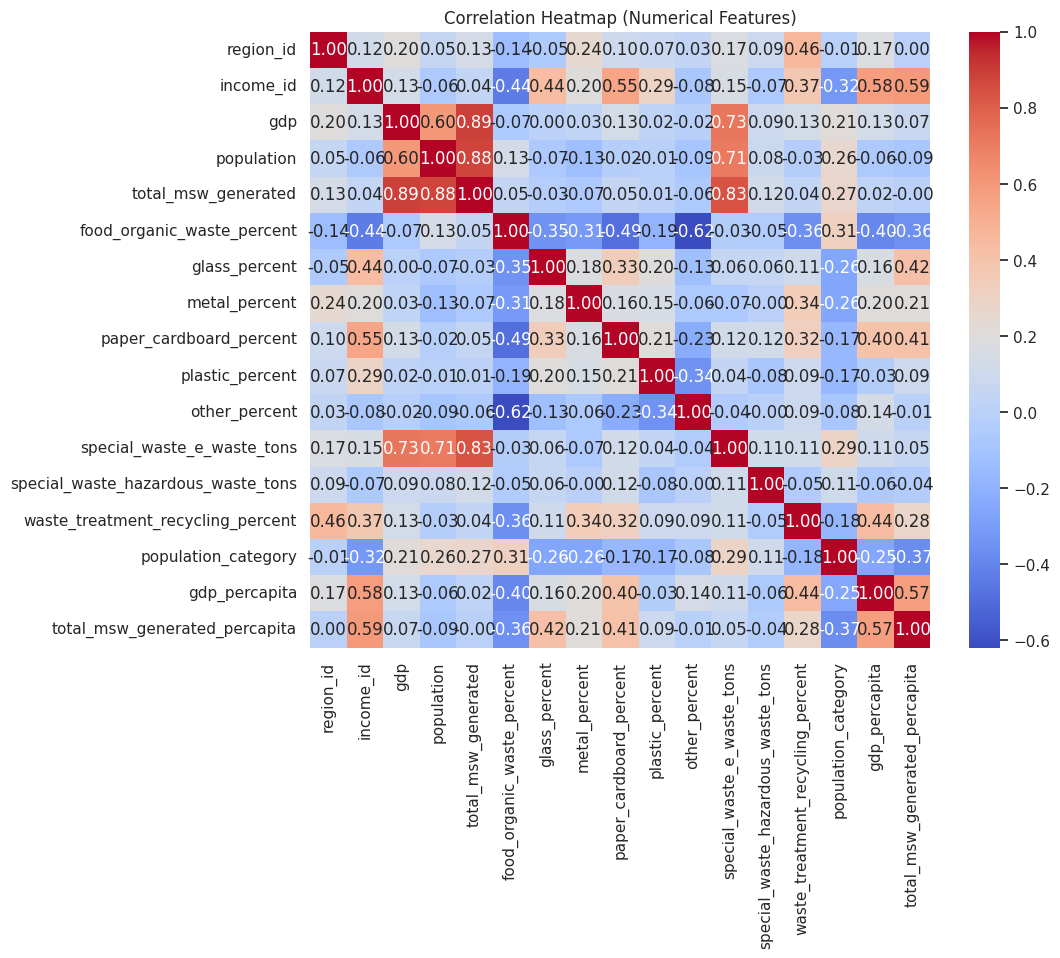

In [342]:
# create a heatmap
numerical_features = data.select_dtypes(include=[np.number])  # Select numeric columns

correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# plt.figure(figsize = (10,8))
# sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
# plt.title('Correlation Heatmap')
# plt.show()

In [343]:
numerical_features.columns

Index(['region_id', 'income_id', 'gdp', 'population', 'total_msw_generated',
       'food_organic_waste_percent', 'glass_percent', 'metal_percent',
       'paper_cardboard_percent', 'plastic_percent', 'other_percent',
       'special_waste_e_waste_tons', 'special_waste_hazardous_waste_tons',
       'waste_treatment_recycling_percent', 'population_category',
       'gdp_percapita', 'total_msw_generated_percapita'],
      dtype='object')

In [344]:
# create binary columns
# data_encoded = pd.get_dummies(data, columns = ['income_id','region_id'])

# select relevant features
# features = ['population', 'gdp'] + list(data_encoded.filter(like='region_') | data_encoded.filter(like='income_'))
features = ['population', 'gdp']
target = 'total_msw_generated'
ft = ['region_id', 'income_id', 'gdp', 'population',
       'food_organic_waste_percent', 'glass_percent', 'metal_percent',
       'paper_cardboard_percent', 'plastic_percent', 'other_percent',
       'special_waste_e_waste_tons', 'special_waste_hazardous_waste_tons',
       'waste_treatment_recycling_percent']

# create feature matrix X and target vector y
# X = data_encoded[features]
# y = data_encoded[target]

X = data[features]
# X = data[ft]
y = data[target]

In [345]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(X.shape, X_train.shape, X_test.shape)

(217, 2) (173, 2) (44, 2)


In [346]:
lr_model = LinearRegression()

# perform k-fold cross-validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-validated RMSE scores: {cv_rmse_scores}")
print(f"Mean RMSE: {np.mean(cv_rmse_scores):.4f}")

# Train and evaluate Linear Regression
lr_model.fit(X_train, y_train)

# feature importance analysis
feature_importance = pd.Series(lr_model.coef_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# make prediction on the test set
y_pred = lr_model.predict(X_test)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared: {r2:.4f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

Cross-validated RMSE scores: [ 6867434.23010188 15210482.90883275  2798217.67190772  4456706.45784954
 11715425.38531173]
Mean RMSE: 8209653.3308

Feature Importance:
population    0.141524
gdp           0.000009
dtype: float64

R-squared: 0.8768
Mean Absolute Error: 1233996.8030


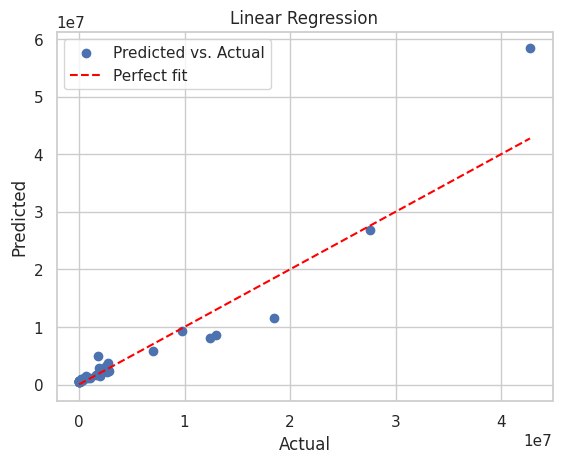

In [347]:
# plot the regression line
plt.scatter(y_test, y_pred, label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# RERGRESSION PREDICTION (SALLY)

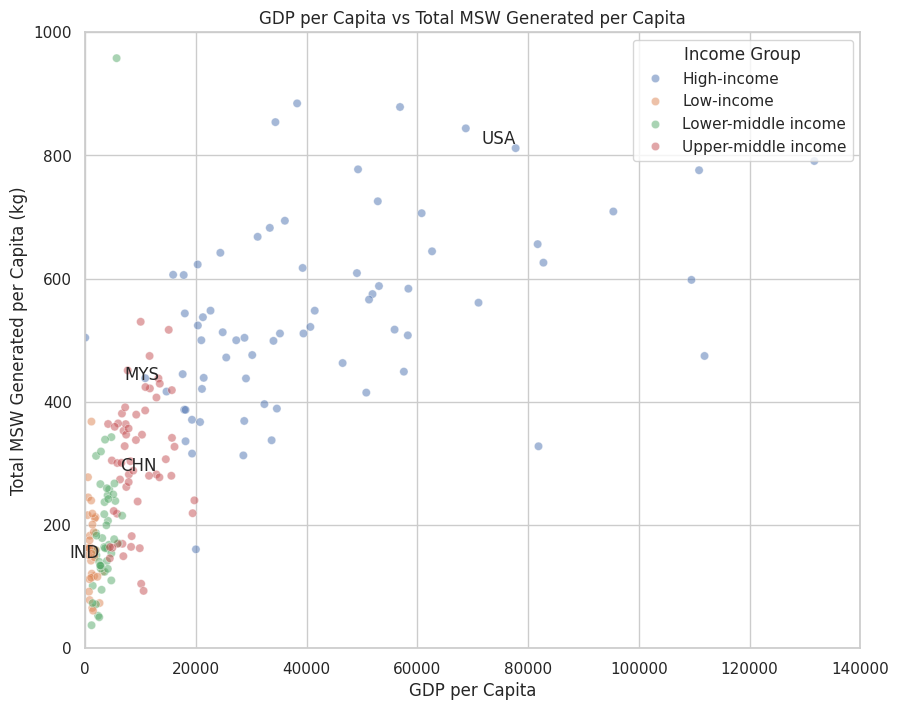

In [348]:
import matplotlib.pyplot as plt

gdp_percapita = data['gdp'] / data['population']
total_msw_generated_percapita = (data['total_msw_generated'] * 1000) / data['population']
countries = data['iso3c']  # Assuming you have a column for country names

# Create a scatter plot
plt.figure(figsize=(10,8))

income_group_names = {
    0: 'Low-income',
    1: 'Lower-middle income',
    2: 'Upper-middle income',
    3: 'High-income'
}
data['Income Group'] = data['income_id'].map(income_group_names)

sns.scatterplot(x=gdp_percapita, y=total_msw_generated_percapita, alpha=0.5, hue=data['Income Group'], palette="deep")

countries_to_annotate = ['USA', 'CHN', 'IND', 'MYS']

for country in countries_to_annotate:
    x_coord = gdp_percapita[data['iso3c'] == country].values[0]
    y_coord = total_msw_generated_percapita[data['iso3c'] == country].values[0]
    plt.text(x_coord, y_coord, country, fontsize=12, ha='right', va='bottom')

plt.xlim(0, 140000)  # Specify the range for the x-axis
plt.ylim(0, 1000)   # Specify the range for the y-axis



plt.title('GDP per Capita vs Total MSW Generated per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Total MSW Generated per Capita (kg)')
plt.grid(True)
plt.show()


In [349]:
data['log_gdp_percapita'] = np.log(data['gdp_percapita'])
data['log_total_msw_generated_percapita'] = np.log(data['total_msw_generated_percapita'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [350]:
data

,iso3c,region_id,country_name,income_id,gdp,population,total_msw_generated,food_organic_waste_percent,glass_percent,metal_percent,...,national_agency_enforcing_waste_laws,national_law_governing_solid_waste_management,ppp_rules_and_regulations,public_waste_info_summary,population_category,gdp_percapita,total_msw_generated_percapita,Income Group,log_gdp_percapita,log_total_msw_generated_percapita
0,ABW,0,Aruba,3,3.544708e+09,103187,8.813202e+04,29.855556,9.100000,7.122222,...,Yes,Yes,Yes,Yes,0,34352.271003,0.854100,High-income,10.444423,-0.157707
1,AFG,1,Afghanistan,0,1.426650e+10,34656032,5.628525e+06,52.390000,4.360000,1.900000,...,Yes,Yes,Yes,Unknown,2,411.659922,0.162411,Low-income,6.020198,-1.817624
2,AGO,2,Angola,1,1.070000e+11,25096150,4.213644e+06,51.800000,6.700000,4.400000,...,Unknown,Yes,Yes,Unknown,2,4263.602186,0.167900,Lower-middle income,8.357870,-1.784387
3,ALB,3,Albania,2,1.891638e+10,2854191,1.087447e+06,51.400000,4.500000,4.800000,...,Yes,Yes,Yes,No,1,6627.579886,0.381000,Upper-middle income,8.798995,-0.964956
4,AND,3,Andorra,3,3.352031e+09,82431,4.300000e+04,31.200000,8.200000,2.600000,...,Yes,Yes,Yes,Unknown,0,40664.690396,0.521648,High-income,10.613115,-0.650761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,3,Kosovo,1,9.409474e+09,1801800,3.190000e+05,42.000000,6.000000,6.000000,...,Yes,Yes,Yes,Unknown,1,5222.263025,0.177045,Lower-middle income,8.560686,-1.731350
213,YEM,4,"Yemen, Rep.",0,2.160616e+10,27584212,4.836820e+06,65.000000,1.000000,6.000000,...,Yes,Yes,No,Unknown,2,783.279971,0.175347,Low-income,6.663490,-1.740986
214,ZAF,2,South Africa,2,4.050000e+11,51729344,1.845723e+07,16.381655,5.200216,16.910461,...,Yes,Yes,Unknown,Unknown,2,7829.211985,0.356804,Upper-middle income,8.965617,-1.030569
215,ZMB,2,Zambia,1,2.916378e+10,14264756,2.608268e+06,52.566667,2.914286,2.166667,...,Unknown,Yes,Unknown,Unknown,2,2044.464142,0.182847,Lower-middle income,7.622891,-1.699105


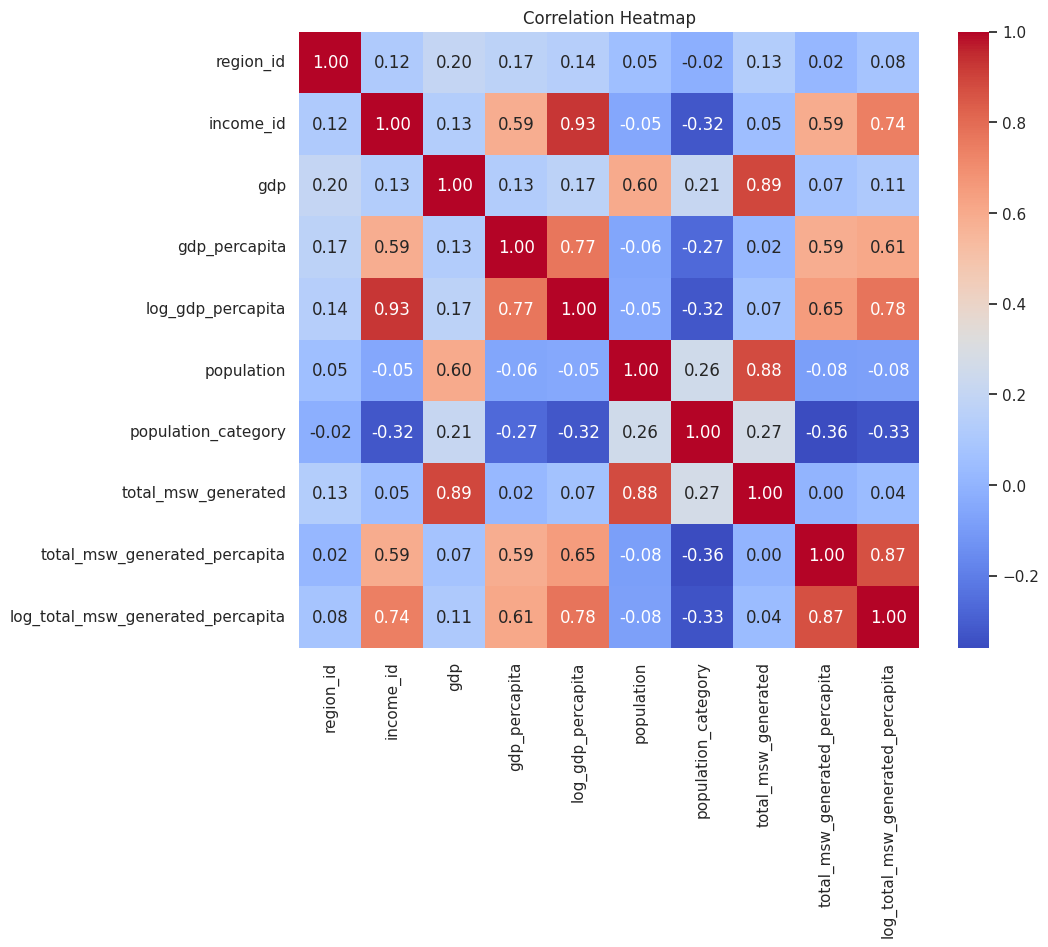

In [391]:
df = data[['region_id','income_id','gdp', 'gdp_percapita', 'log_gdp_percapita', 'population', 'population_category',
           'total_msw_generated', 'total_msw_generated_percapita', 'log_total_msw_generated_percapita']]

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

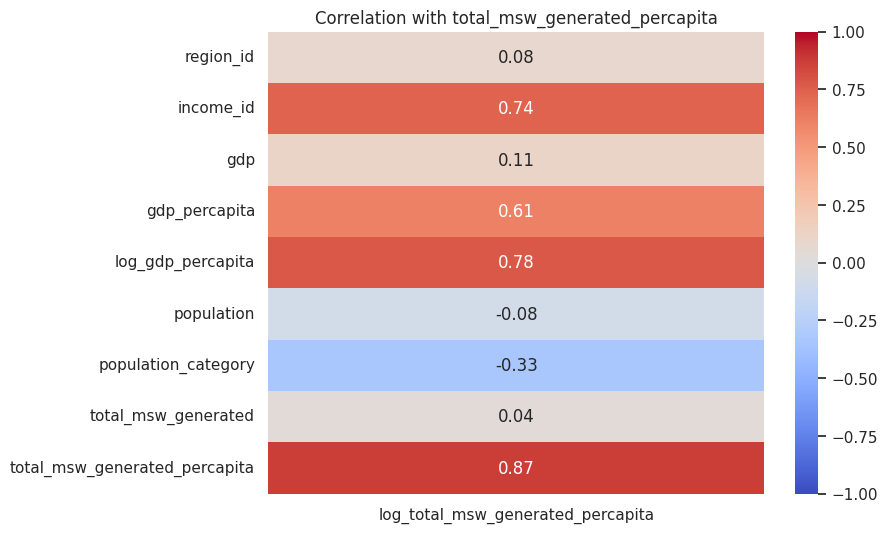

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the relevant columns

# Compute the correlation matrix
corr_matrix = df.corr()

# Isolate the correlations of interest (only with total_msw_generated_percapita)
corr_with_target = corr_matrix[['log_total_msw_generated_percapita']].drop('log_total_msw_generated_percapita')

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_with_target, cmap='coolwarm', annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation with total_msw_generated_percapita")
plt.show()


## best model for now?



*   Mean MAE: 0.13742200478848685
*   Mean MSE: 0.06403674651993288
*   Mean R-squared: 0.44902033893959403





In [353]:
# X = df.drop(['total_msw_generated_percapita', 'total_msw_generated', 'population'], axis=1)

X = data[['gdp_percapita', 'income_id']]
y = data['total_msw_generated_percapita']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Perform cross-validation
cv_scores_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

# Convert scores to positive values
cv_scores_mae = -cv_scores_mae
cv_scores_mse = -cv_scores_mse

# Print the cross-validation scores
print("Mean MAE:", cv_scores_mae.mean())
print("Mean MSE:", cv_scores_mse.mean())
print("Mean R-squared:", cv_scores_r2.mean())

# Calculate feature importance
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Mean MAE: 0.13742200478848685
Mean MSE: 0.06403674651993288
Mean R-squared: 0.44902033893959403

Feature Importance:
income_id        0.116257
gdp_percapita    0.000003
dtype: float64


In [354]:
gdp_data = pd.read_excel('/content/drive/MyDrive/Data anlytics/country_ gdp_prediction.xlsx')
# gdp_data = pd.read_excel('/content/drive/MyDrive/DA Project/country_ gdp_prediction.xlsx') #irham
prediction = pd.merge(data, gdp_data, left_on='iso3c', right_on='ISO')
prediction.head()

,iso3c,region_id,country_name,income_id,gdp,population,total_msw_generated,food_organic_waste_percent,glass_percent,metal_percent,...,gdp2020,gdp2021,gdp2022,gdp2023,gdp2024,gdp2025,gdp2026,gdp2027,gdp2028,gdp2029
0,ABW,0,Aruba,3,3.544708e+09,103187,8.813202e+04,29.855556,9.10,7.122222,...,28697.096,36930.258,40940.974,43178.994,43694.872,44187.587,44742.213,45316.552,45914.084,46519.494
1,AFG,1,Afghanistan,0,1.426650e+10,34656032,5.628525e+06,52.390000,4.36,1.900000,...,2328.757,1945.371,1793.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,2,Angola,1,1.070000e+11,25096150,4.213644e+06,51.800000,6.70,4.400000,...,6024.653,5906.891,5880.912,5736.462,5711.848,5718.959,5740.869,5768.622,5800.329,5835.771
3,ALB,3,Albania,2,1.891638e+10,2854191,1.087447e+06,51.400000,4.50,4.800000,...,13419.375,14639.597,15383.880,15935.294,16476.659,17090.905,17750.321,18431.571,19144.767,19889.199
4,AND,3,Andorra,3,3.352031e+09,82431,4.300000e+04,31.200000,8.20,2.600000,...,49728.236,52819.990,56415.783,55317.396,55218.640,54957.623,54697.840,54439.286,54181.953,53925.837


In [355]:
prediction = prediction[['ISO', 'country_name', 'region_id', 'income_id', 'gdp_percapita',
                          'gdp2020', 'gdp2021', 'gdp2022', 'gdp2023', 'gdp2024',
                          'gdp2025', 'gdp2026', 'gdp2027', 'gdp2028', 'gdp2029', 'total_msw_generated_percapita']]

In [356]:
prediction = prediction.rename(columns={'total_msw_generated_percapita': 'totalwaste_percapita2019'})

In [357]:
prediction.dropna(inplace = True)
prediction.columns

Index(['ISO', 'country_name', 'region_id', 'income_id', 'gdp_percapita',
       'gdp2020', 'gdp2021', 'gdp2022', 'gdp2023', 'gdp2024', 'gdp2025',
       'gdp2026', 'gdp2027', 'gdp2028', 'gdp2029', 'totalwaste_percapita2019'],
      dtype='object')

In [358]:
gdpyear = ['gdp2020', 'gdp2021', 'gdp2022', 'gdp2023', 'gdp2024', 'gdp2025',
           'gdp2026', 'gdp2027', 'gdp2028', 'gdp2029']

In [359]:
for y in gdpyear:
  pred = prediction[[y,'income_id']]
  pred = pred.rename(columns={y: 'gdp_percapita'})

  # New column name
  s = y.replace('gdp','totalwaste_percapita')

  # Predict waste generation per capita for year
  prediction[s] = model.predict(pred)

In [360]:
prediction

,ISO,country_name,region_id,income_id,gdp_percapita,gdp2020,gdp2021,gdp2022,gdp2023,gdp2024,...,totalwaste_percapita2020,totalwaste_percapita2021,totalwaste_percapita2022,totalwaste_percapita2023,totalwaste_percapita2024,totalwaste_percapita2025,totalwaste_percapita2026,totalwaste_percapita2027,totalwaste_percapita2028,totalwaste_percapita2029
0,ABW,Aruba,0,3,34352.271003,28697.096,36930.258,40940.974,43178.994,43694.872,...,0.552994,0.581376,0.595202,0.602917,0.604695,0.606394,0.608306,0.610285,0.612345,0.614432
2,AGO,Angola,2,1,4263.602186,6024.653,5906.891,5880.912,5736.462,5711.848,...,0.242321,0.241915,0.241826,0.241328,0.241243,0.241267,0.241343,0.241439,0.241548,0.241670
3,ALB,Albania,3,2,6627.579886,13419.375,14639.597,15383.880,15935.294,16476.659,...,0.384070,0.388277,0.390842,0.392743,0.394609,0.396727,0.399000,0.401348,0.403807,0.406373
4,AND,Andorra,3,3,40664.690396,49728.236,52819.990,56415.783,55317.396,55218.640,...,0.625494,0.636152,0.648547,0.644761,0.644421,0.643521,0.642625,0.641734,0.640847,0.639964
5,ARE,United Arab Emirates,4,3,51890.742047,67703.847,68616.121,73407.205,75301.777,77339.169,...,0.687460,0.690605,0.707121,0.713653,0.720676,0.729686,0.739330,0.749662,0.760736,0.772545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,WSM,Samoa,5,2,4438.468578,5622.271,5182.449,4868.279,5165.647,5366.885,...,0.357191,0.355675,0.354592,0.355617,0.356311,0.356683,0.356923,0.357068,0.357182,0.357297
188,YEM,"Yemen, Rep.",4,0,783.279971,1784.012,1727.547,1717.606,1646.271,1594.345,...,0.111445,0.111251,0.111216,0.110970,0.110791,0.110751,0.111008,0.111251,0.111479,0.111686
189,ZAF,South Africa,2,2,7829.211985,12689.598,13171.301,13320.820,13199.661,13115.600,...,0.381554,0.383215,0.383730,0.383313,0.383023,0.382884,0.382817,0.382762,0.382706,0.382651
190,ZMB,Zambia,2,1,2044.464142,3183.658,3287.428,3365.881,3417.371,3482.842,...,0.232528,0.232885,0.233156,0.233333,0.233559,0.233809,0.234060,0.234339,0.234635,0.234937


In [361]:
for year in range(2019, 2030):
    column_name = f'totalwaste_percapita{year}'
    prediction[column_name] = prediction[column_name] * 1000

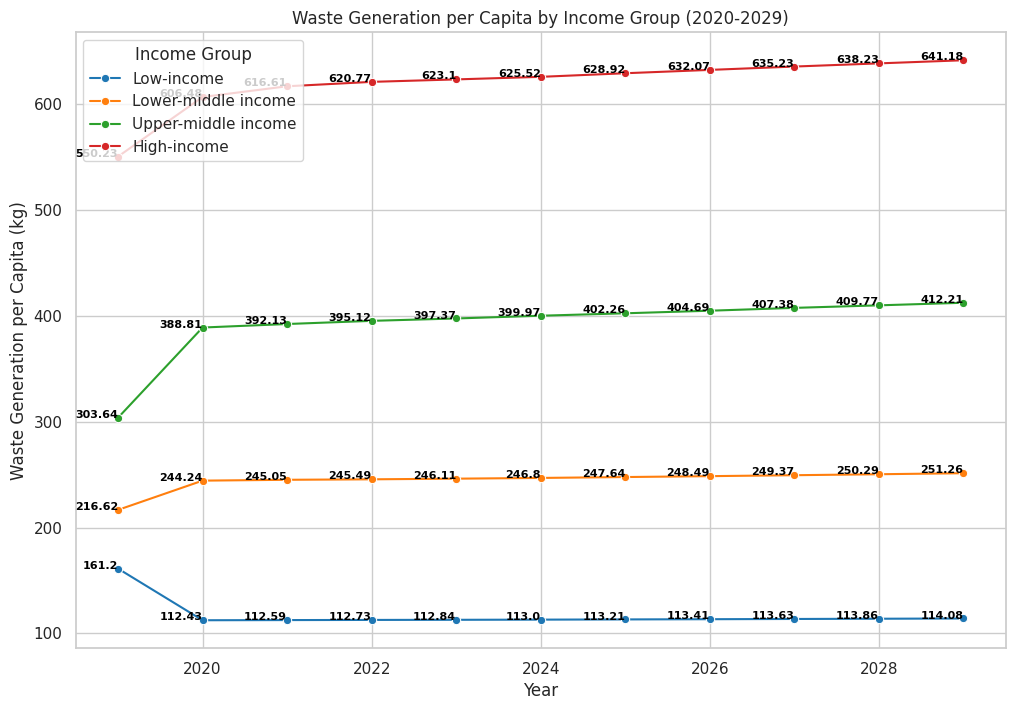

In [362]:
income_groups = prediction['income_id'].unique()
average_waste = prediction.groupby('income_id')[[f'totalwaste_percapita{year}' for year in range(2019, 2030)]].mean()

average_waste = average_waste.reset_index()
average_waste_long = pd.melt(average_waste, id_vars=['income_id'], var_name='Year', value_name='Waste_per_capita')
average_waste_long['Year'] = average_waste_long['Year'].str.extract('(\d+)').astype(int)

# Define income group names for better labeling
income_group_names = {
    0: 'Low-income',
    1: 'Lower-middle income',
    2: 'Upper-middle income',
    3: 'High-income'
}
average_waste_long['Income Group'] = average_waste_long['income_id'].map(income_group_names)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Waste_per_capita', hue='Income Group', data=average_waste_long, palette='tab10', marker='o')

for line in range(0, average_waste_long.shape[0]):
    plt.text(
        average_waste_long.Year[line],
        average_waste_long.Waste_per_capita[line],
        round(average_waste_long.Waste_per_capita[line], 2),
        horizontalalignment='right',
        fontsize=8,
        color='black',
        weight='semibold'
    )

# Customize plot
plt.title('Waste Generation per Capita by Income Group (2020-2029)')
plt.xlabel('Year')
plt.ylabel('Waste Generation per Capita (kg)')
plt.legend(title='Income Group', loc='upper left')
plt.show()

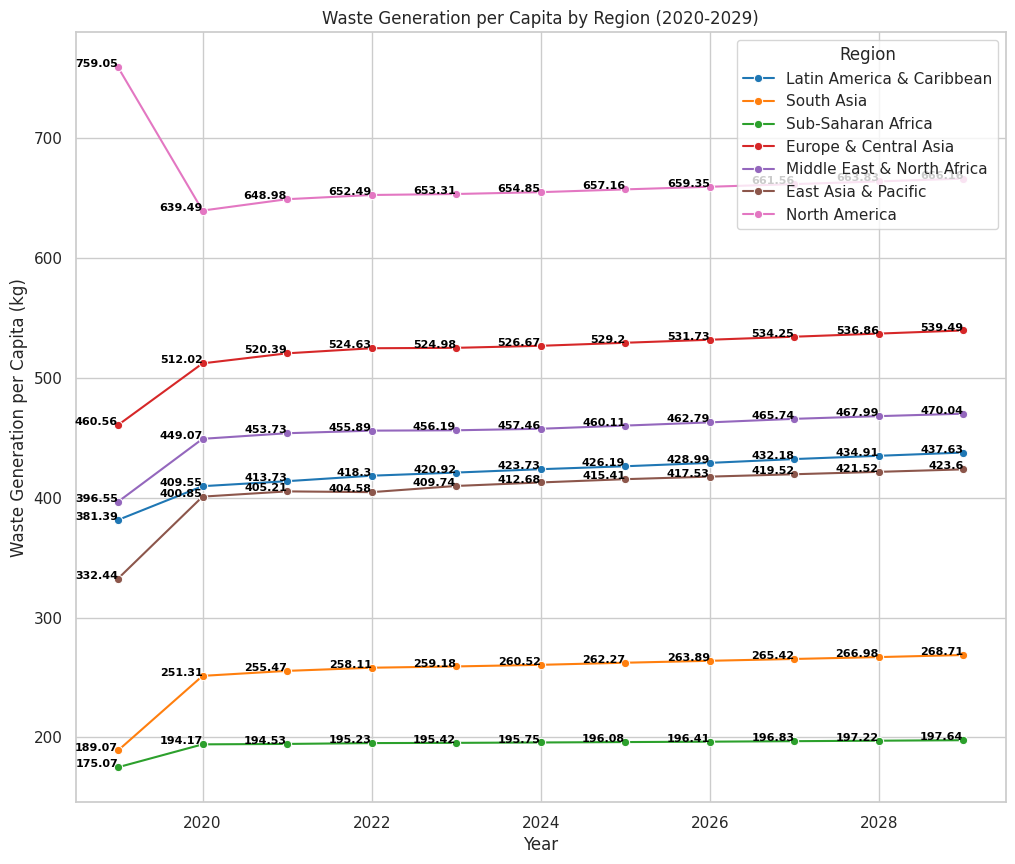

In [363]:
region_group = prediction['region_id'].unique()
average_waste = prediction.groupby('region_id')[[f'totalwaste_percapita{year}' for year in range(2019, 2030)]].mean()

average_waste = average_waste.reset_index()
average_waste_long = pd.melt(average_waste, id_vars=['region_id'], var_name='Year', value_name='Waste_per_capita')
average_waste_long['Year'] = average_waste_long['Year'].str.extract('(\d+)').astype(int)

# Define income group names for better labeling
income_group_names = {
    0: 'Latin America & Caribbean',
    1: 'South Asia',
    2: 'Sub-Saharan Africa',
    3: 'Europe & Central Asia',
    4: 'Middle East & North Africa',
    5: 'East Asia & Pacific',
    6: 'North America'
}
average_waste_long['Region Group'] = average_waste_long['region_id'].map(income_group_names)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.lineplot(x='Year', y='Waste_per_capita', hue='Region Group', data=average_waste_long, palette='tab10', marker='o')

for line in range(0, average_waste_long.shape[0]):
    plt.text(
        average_waste_long.Year[line],
        average_waste_long.Waste_per_capita[line],
        round(average_waste_long.Waste_per_capita[line], 2),
        horizontalalignment='right',
        fontsize=8,
        color='black',
        weight='semibold'
    )


# Customize plot
plt.title('Waste Generation per Capita by Region (2020-2029)')
plt.xlabel('Year')
plt.ylabel('Waste Generation per Capita (kg)')
plt.legend(title='Region', loc='best')
plt.show()

In [364]:
prediction.columns

Index(['ISO', 'country_name', 'region_id', 'income_id', 'gdp_percapita',
       'gdp2020', 'gdp2021', 'gdp2022', 'gdp2023', 'gdp2024', 'gdp2025',
       'gdp2026', 'gdp2027', 'gdp2028', 'gdp2029', 'totalwaste_percapita2019',
       'totalwaste_percapita2020', 'totalwaste_percapita2021',
       'totalwaste_percapita2022', 'totalwaste_percapita2023',
       'totalwaste_percapita2024', 'totalwaste_percapita2025',
       'totalwaste_percapita2026', 'totalwaste_percapita2027',
       'totalwaste_percapita2028', 'totalwaste_percapita2029'],
      dtype='object')

In [365]:
totalwastes = ['ISO', 'country_name', 'region_id', 'income_id','totalwaste_percapita2019',
       'totalwaste_percapita2020', 'totalwaste_percapita2021',
       'totalwaste_percapita2022', 'totalwaste_percapita2023',
       'totalwaste_percapita2024', 'totalwaste_percapita2025',
       'totalwaste_percapita2026', 'totalwaste_percapita2027',
       'totalwaste_percapita2028', 'totalwaste_percapita2029']

In [366]:
prediction.loc[prediction['region_id'] == 6, totalwastes]

,ISO,country_name,region_id,income_id,totalwaste_percapita2019,totalwaste_percapita2020,totalwaste_percapita2021,totalwaste_percapita2022,totalwaste_percapita2023,totalwaste_percapita2024,totalwaste_percapita2025,totalwaste_percapita2026,totalwaste_percapita2027,totalwaste_percapita2028,totalwaste_percapita2029
30,CAN,Canada,6,3,706.241157,614.347281,621.828572,625.351137,622.415180,620.605679,622.259443,623.267075,624.061042,624.919163,625.830403
181,USA,United States,6,3,811.860073,664.628100,676.129366,679.628372,684.214339,689.091286,692.066363,695.428240,699.056557,702.743815,706.486570


In [367]:
prediction.loc[prediction['income_id'] == 3, totalwastes]

,ISO,country_name,region_id,income_id,totalwaste_percapita2019,totalwaste_percapita2020,totalwaste_percapita2021,totalwaste_percapita2022,totalwaste_percapita2023,totalwaste_percapita2024,totalwaste_percapita2025,totalwaste_percapita2026,totalwaste_percapita2027,totalwaste_percapita2028,totalwaste_percapita2029
0,ABW,Aruba,0,3,854.100000,552.993798,581.375698,595.201703,602.916753,604.695122,606.393642,608.305585,610.285485,612.345336,614.432346
4,AND,Andorra,3,3,521.648409,625.493733,636.151832,648.547487,644.761055,644.420616,643.520821,642.625280,641.733976,640.846881,639.963981
5,ARE,United Arab Emirates,4,3,574.961908,687.460447,690.605298,707.121439,713.652533,720.675965,729.685512,739.330452,749.661692,760.735662,772.544844
6,ARG,Argentina,0,3,416.703543,521.959679,528.527561,531.497850,529.528299,526.715871,529.595349,532.208790,534.452684,536.124071,537.180696
8,ATG,Antigua and Barbuda,0,3,316.035835,515.373125,518.443826,522.895391,525.916392,529.246747,531.244545,532.351559,533.476667,534.628602,535.808053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,SYC,Seychelles,2,3,543.582891,553.502132,553.201485,567.043844,570.166671,572.857379,576.267749,579.745748,583.240993,586.765388,590.315752
172,TTO,Trinidad and Tobago,0,3,548.056622,541.546386,540.186984,541.014255,542.397750,544.045681,545.688066,546.052545,547.661667,549.931174,552.154875
176,TWN,Taiwan,5,3,313.049415,637.263544,650.945505,656.400580,659.346334,665.652114,671.427664,676.895907,682.273339,687.584617,692.339652
180,URY,Uruguay,0,3,367.221452,527.224743,531.029511,534.382922,534.415127,537.123761,539.268805,541.224449,543.049277,544.823595,546.542805


# model Log

In [372]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Assuming 'data' is your DataFrame containing the relevant columns
# Transform the variables using natural logarithm
data['log_gdp_percapita'] = np.log(data['gdp_percapita'])
data['log_total_msw_generated_percapita'] = np.log(data['total_msw_generated_percapita'])

# Prepare the features and target variable
X = data[['log_gdp_percapita', 'income_id']]
y = data['log_total_msw_generated_percapita']

# Fit linear regression model
modelLog = LinearRegression()
modelLog.fit(X, y)

# Perform cross-validation
cv_scores_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

# Convert scores to positive values
cv_scores_mae = -cv_scores_mae
cv_scores_mse = -cv_scores_mse

# Print the cross-validation scores
print("Mean MAE:", cv_scores_mae.mean())
print("Mean MSE:", cv_scores_mse.mean())
print("Mean R-squared:", cv_scores_r2.mean())

# Calculate feature importance
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Mean MAE: 0.3307566483903654
Mean MSE: 0.20814342302279787
Mean R-squared: 0.6033219220362078

Feature Importance:
income_id            0.116257
log_gdp_percapita    0.000003
dtype: float64


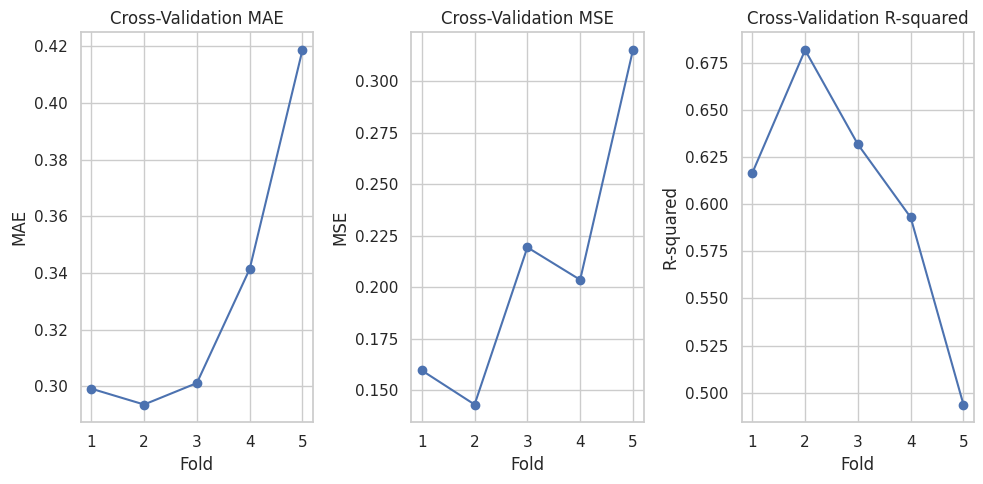

In [390]:
import matplotlib.pyplot as plt

# Plotting the cross-validation scores
plt.figure(figsize=(10, 5))

# MAE
plt.subplot(1, 3, 1)
plt.plot(range(1, 6), cv_scores_mae, marker='o', linestyle='-')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')

# MSE
plt.subplot(1, 3, 2)
plt.plot(range(1, 6), cv_scores_mse, marker='o', linestyle='-')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')

# R-squared
plt.subplot(1, 3, 3)
plt.plot(range(1, 6), cv_scores_r2, marker='o', linestyle='-')
plt.title('Cross-Validation R-squared')
plt.xlabel('Fold')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()


In [374]:
gdp_data = pd.read_excel('/content/drive/MyDrive/Data anlytics/country_ gdp_prediction.xlsx')
# gdp_data = pd.read_excel('/content/drive/MyDrive/DA Project/country_ gdp_prediction.xlsx') #irham
predictionLog = pd.merge(data, gdp_data, left_on='iso3c', right_on='ISO')
predictionLog.head()

,iso3c,region_id,country_name,income_id,gdp,population,total_msw_generated,food_organic_waste_percent,glass_percent,metal_percent,...,gdp2020,gdp2021,gdp2022,gdp2023,gdp2024,gdp2025,gdp2026,gdp2027,gdp2028,gdp2029
0,ABW,0,Aruba,3,3.544708e+09,103187,8.813202e+04,29.855556,9.10,7.122222,...,28697.096,36930.258,40940.974,43178.994,43694.872,44187.587,44742.213,45316.552,45914.084,46519.494
1,AFG,1,Afghanistan,0,1.426650e+10,34656032,5.628525e+06,52.390000,4.36,1.900000,...,2328.757,1945.371,1793.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,2,Angola,1,1.070000e+11,25096150,4.213644e+06,51.800000,6.70,4.400000,...,6024.653,5906.891,5880.912,5736.462,5711.848,5718.959,5740.869,5768.622,5800.329,5835.771
3,ALB,3,Albania,2,1.891638e+10,2854191,1.087447e+06,51.400000,4.50,4.800000,...,13419.375,14639.597,15383.880,15935.294,16476.659,17090.905,17750.321,18431.571,19144.767,19889.199
4,AND,3,Andorra,3,3.352031e+09,82431,4.300000e+04,31.200000,8.20,2.600000,...,49728.236,52819.990,56415.783,55317.396,55218.640,54957.623,54697.840,54439.286,54181.953,53925.837


In [375]:
predictionLog = predictionLog[['ISO', 'country_name', 'region_id', 'income_id', 'gdp_percapita',
                          'gdp2020', 'gdp2021', 'gdp2022', 'gdp2023', 'gdp2024',
                          'gdp2025', 'gdp2026', 'gdp2027', 'gdp2028', 'gdp2029', 'total_msw_generated_percapita']]

In [376]:
predictionLog = predictionLog.rename(columns={'total_msw_generated_percapita': 'totalwaste_percapita2019'})
predictionLog.dropna(inplace = True)
predictionLog.columns

Index(['ISO', 'country_name', 'region_id', 'income_id', 'gdp_percapita',
       'gdp2020', 'gdp2021', 'gdp2022', 'gdp2023', 'gdp2024', 'gdp2025',
       'gdp2026', 'gdp2027', 'gdp2028', 'gdp2029', 'totalwaste_percapita2019'],
      dtype='object')

In [380]:
predictionLog.isnull().sum()

ISO                         0
country_name                0
region_id                   0
income_id                   0
gdp_percapita               0
gdp2020                     0
gdp2021                     0
gdp2022                     0
gdp2023                     0
gdp2024                     0
gdp2025                     0
gdp2026                     0
gdp2027                     0
gdp2028                     0
gdp2029                     0
totalwaste_percapita2019    0
dtype: int64

In [377]:
gdpyear = ['gdp2020', 'gdp2021', 'gdp2022', 'gdp2023', 'gdp2024', 'gdp2025',
           'gdp2026', 'gdp2027', 'gdp2028', 'gdp2029']

In [383]:
import numpy as np

# Assuming 'prediction' is your DataFrame containing the relevant columns

for y in gdpyear:
    # Selecting features for prediction and renaming the columns
    pred = predictionLog[[y, 'income_id']]

    # Transforming GDP to natural logarithm
    pred[y] = np.log(pred[y])
    pred = pred.rename(columns={y: 'log_gdp_percapita'})

    # New column name for the predicted waste generation per capita
    s = y.replace('gdp', 'totalwaste_percapita')

    # Predicting the log-transformed waste generation per capita for the year
    predicted_log_waste = modelLog.predict(pred)

    # Reverse the logarithm transformation
    predicted_waste = np.exp(predicted_log_waste)

    # Clip predictions to avoid infinite values
    min_value = predicted_waste.min() if (predicted_waste > 0).any() else 0
    predicted_waste = np.clip(predicted_waste, min_value, None)

    # Assign the predictions to the DataFrame
    predictionLog[s] = predicted_waste


<ipython-input-383-d35894c87677>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred[y] = np.log(pred[y])
<ipython-input-383-d35894c87677>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred[y] = np.log(pred[y])
<ipython-input-383-d35894c87677>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [384]:
predictionLog

,ISO,country_name,region_id,income_id,gdp_percapita,gdp2020,gdp2021,gdp2022,gdp2023,gdp2024,...,totalwaste_percapita2020,totalwaste_percapita2021,totalwaste_percapita2022,totalwaste_percapita2023,totalwaste_percapita2024,totalwaste_percapita2025,totalwaste_percapita2026,totalwaste_percapita2027,totalwaste_percapita2028,totalwaste_percapita2029
0,ABW,Aruba,0,3,34352.271003,28697.096,36930.258,40940.974,43178.994,43694.872,...,0.498441,0.540849,0.559205,0.568923,0.571115,0.573192,0.575511,0.577892,0.580348,0.582814
2,AGO,Angola,2,1,4263.602186,6024.653,5906.891,5880.912,5736.462,5711.848,...,0.245786,0.244221,0.243872,0.241917,0.241580,0.241678,0.241977,0.242355,0.242785,0.243265
3,ALB,Albania,3,2,6627.579886,13419.375,14639.597,15383.880,15935.294,16476.659,...,0.352330,0.362398,0.368262,0.372485,0.376535,0.381023,0.385721,0.390453,0.395281,0.400193
4,AND,Andorra,3,3,40664.690396,49728.236,52819.990,56415.783,55317.396,55218.640,...,0.595535,0.607278,0.620364,0.616428,0.616072,0.615128,0.614185,0.613244,0.612304,0.611365
5,ARE,United Arab Emirates,4,3,51890.742047,67703.847,68616.121,73407.205,75301.777,77339.169,...,0.658097,0.660955,0.675555,0.681151,0.687063,0.694495,0.702271,0.710406,0.718914,0.727762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,WSM,Samoa,5,2,4438.468578,5622.271,5182.449,4868.279,5165.647,5366.885,...,0.265852,0.258934,0.253744,0.258661,0.261881,0.263577,0.264653,0.265303,0.265810,0.266318
187,YEM,"Yemen, Rep.",4,0,783.279971,1784.012,1727.547,1717.606,1646.271,1594.345,...,0.149850,0.148298,0.148021,0.146003,0.144496,0.144154,0.146317,0.148304,0.150112,0.151727
188,ZAF,South Africa,2,2,7829.211985,12689.598,13171.301,13320.820,13199.661,13115.600,...,0.346010,0.350208,0.351490,0.350452,0.349728,0.349380,0.349212,0.349073,0.348934,0.348794
189,ZMB,Zambia,2,1,2044.464142,3183.658,3287.428,3365.881,3417.371,3482.842,...,0.199933,0.202020,0.203568,0.204571,0.205832,0.207210,0.208575,0.210071,0.211633,0.213202


In [385]:
for year in range(2019, 2030):
    column_name = f'totalwaste_percapita{year}'
    predictionLog[column_name] = predictionLog[column_name] * 1000

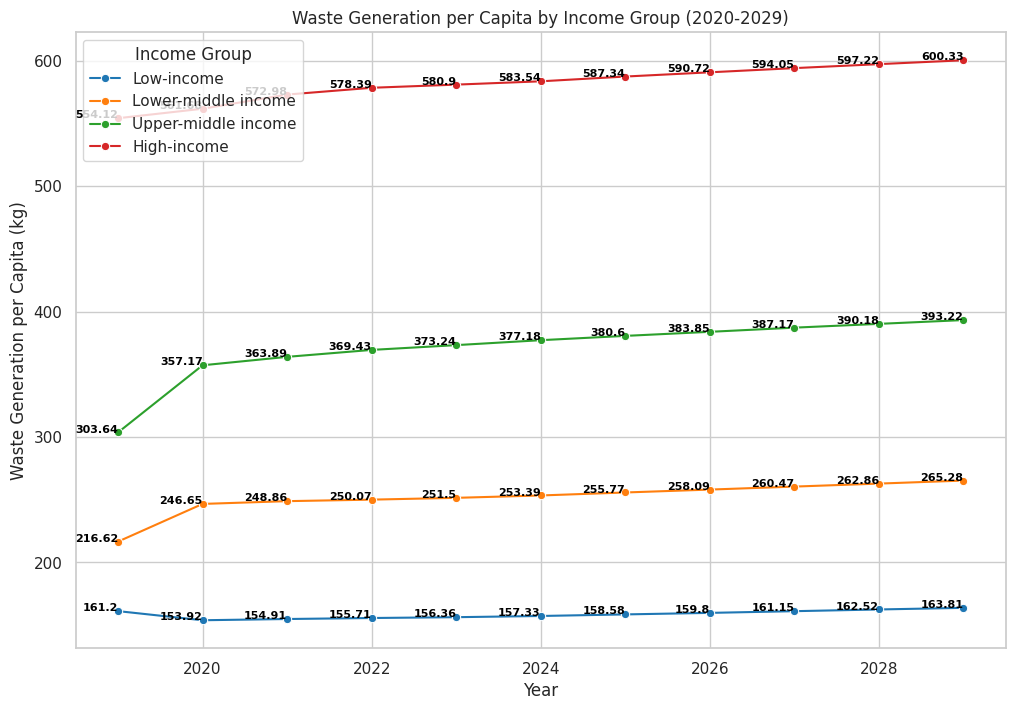

In [386]:
income_groups = predictionLog['income_id'].unique()
average_waste = predictionLog.groupby('income_id')[[f'totalwaste_percapita{year}' for year in range(2019, 2030)]].mean()

average_waste = average_waste.reset_index()
average_waste_long = pd.melt(average_waste, id_vars=['income_id'], var_name='Year', value_name='Waste_per_capita')
average_waste_long['Year'] = average_waste_long['Year'].str.extract('(\d+)').astype(int)

# Define income group names for better labeling
income_group_names = {
    0: 'Low-income',
    1: 'Lower-middle income',
    2: 'Upper-middle income',
    3: 'High-income'
}
average_waste_long['Income Group'] = average_waste_long['income_id'].map(income_group_names)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Waste_per_capita', hue='Income Group', data=average_waste_long, palette='tab10', marker='o')

for line in range(0, average_waste_long.shape[0]):
    plt.text(
        average_waste_long.Year[line],
        average_waste_long.Waste_per_capita[line],
        round(average_waste_long.Waste_per_capita[line], 2),
        horizontalalignment='right',
        fontsize=8,
        color='black',
        weight='semibold'
    )

# Customize plot
plt.title('Waste Generation per Capita by Income Group (2020-2029)')
plt.xlabel('Year')
plt.ylabel('Waste Generation per Capita (kg)')
plt.legend(title='Income Group', loc='upper left')
plt.show()

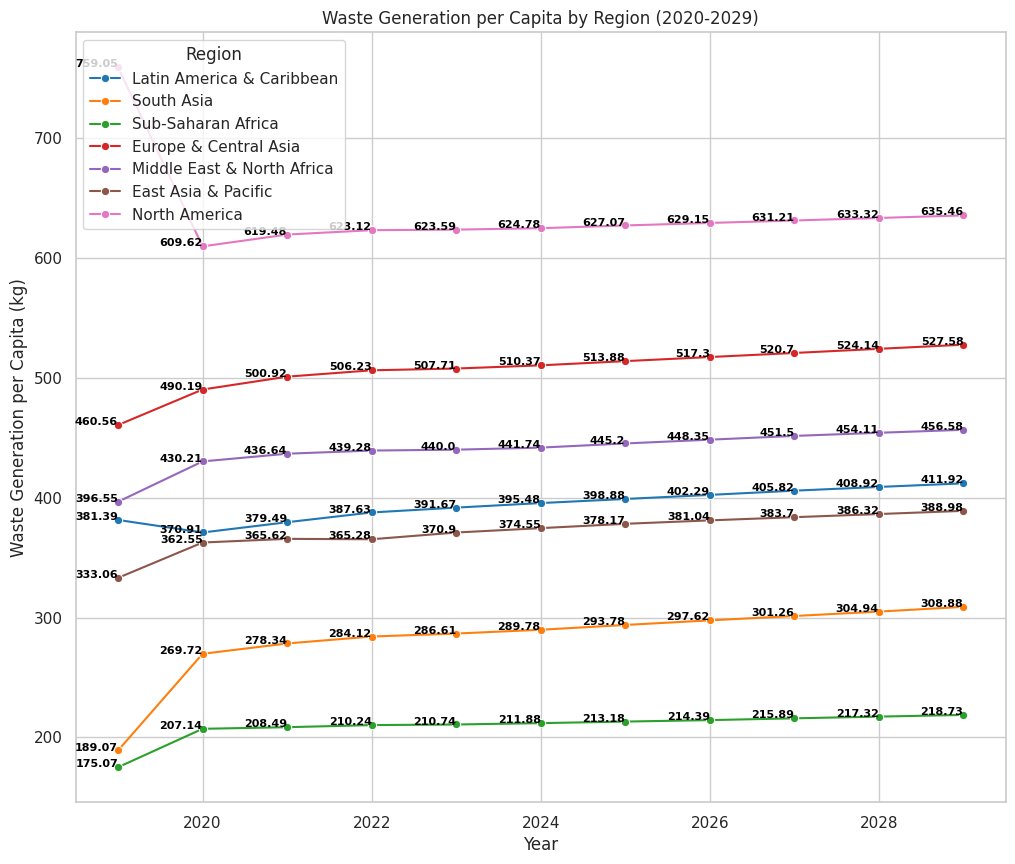

In [389]:
region_group = predictionLog['region_id'].unique()
average_waste = predictionLog.groupby('region_id')[[f'totalwaste_percapita{year}' for year in range(2019, 2030)]].mean()

average_waste = average_waste.reset_index()
average_waste_long = pd.melt(average_waste, id_vars=['region_id'], var_name='Year', value_name='Waste_per_capita')
average_waste_long['Year'] = average_waste_long['Year'].str.extract('(\d+)').astype(int)

# Define income group names for better labeling
income_group_names = {
    0: 'Latin America & Caribbean',
    1: 'South Asia',
    2: 'Sub-Saharan Africa',
    3: 'Europe & Central Asia',
    4: 'Middle East & North Africa',
    5: 'East Asia & Pacific',
    6: 'North America'
}
average_waste_long['Region Group'] = average_waste_long['region_id'].map(income_group_names)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.lineplot(x='Year', y='Waste_per_capita', hue='Region Group', data=average_waste_long, palette='tab10', marker='o')

for line in range(0, average_waste_long.shape[0]):
    plt.text(
        average_waste_long.Year[line],
        average_waste_long.Waste_per_capita[line],
        round(average_waste_long.Waste_per_capita[line], 2),
        horizontalalignment='right',
        fontsize=8,
        color='black',
        weight='semibold'
    )


# Customize plot
plt.title('Waste Generation per Capita by Region (2020-2029)')
plt.xlabel('Year')
plt.ylabel('Waste Generation per Capita (kg)')
plt.legend(title='Region', loc='best')
plt.show()

# **CLUSTERING MODEL**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

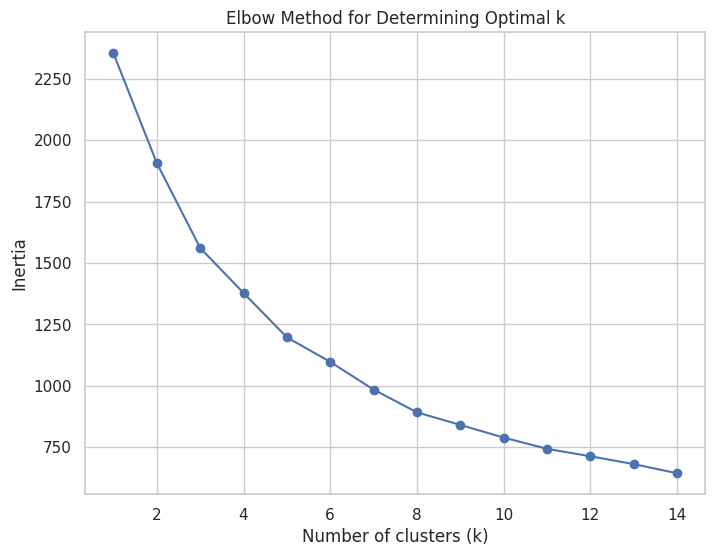

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


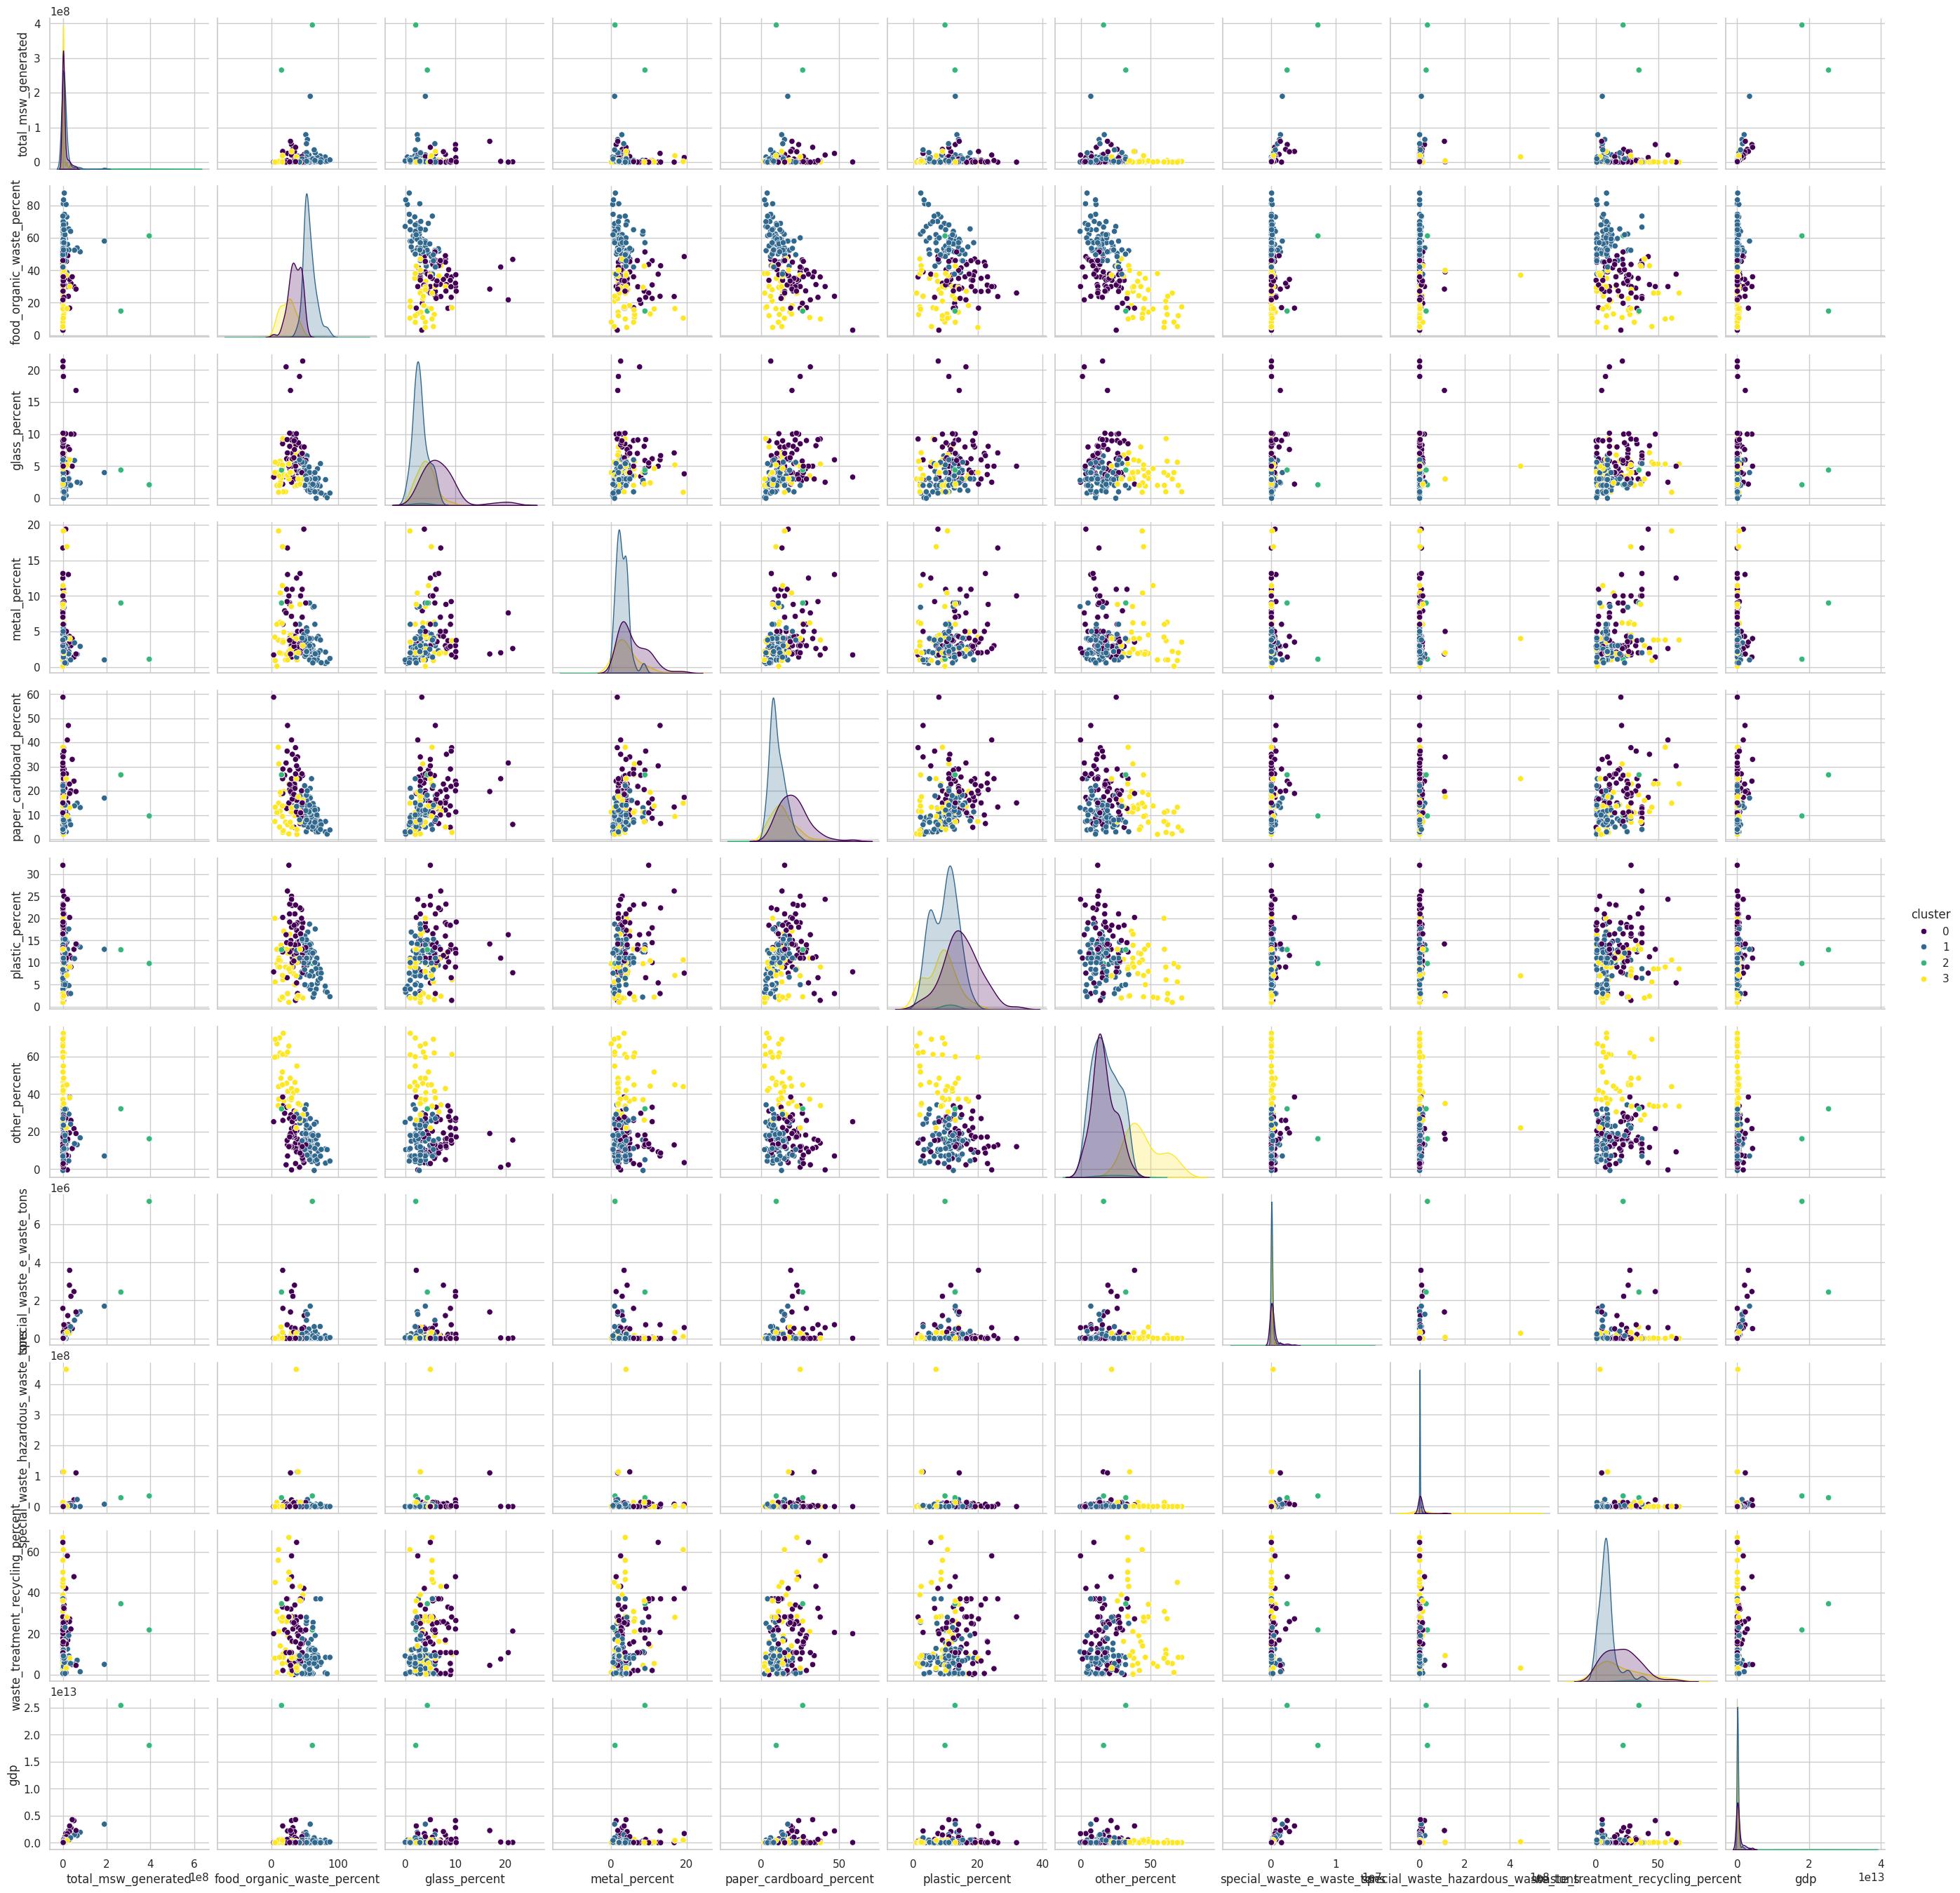

         total_msw_generated  food_organic_waste_percent  glass_percent  \
cluster                                                                   
0               6.276204e+06                   35.070513       6.903995   
1               8.641315e+06                   56.676334       3.003803   
2               3.301530e+08                   38.050000       3.250000   
3               2.805036e+06                   23.976147       4.081346   

         metal_percent  paper_cardboard_percent  plastic_percent  \
cluster                                                            
0             5.900686                20.742997        14.915395   
1             2.967279                10.063759         9.687175   
2             5.050000                18.100000        11.350000   
3             4.595789                13.519335         8.492962   

         other_percent  special_waste_e_waste_tons  \
cluster                                              
0            16.466414          

In [368]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering
features = [
    'total_msw_generated', 'food_organic_waste_percent', 'glass_percent',
    'metal_percent', 'paper_cardboard_percent', 'plastic_percent',
    'other_percent', 'special_waste_e_waste_tons', 'special_waste_hazardous_waste_tons',
    'waste_treatment_recycling_percent', 'gdp'
]

# Handle missing values (if any)
data = data.dropna(subset=features)

# Remove Taiwan
data = data[data['country_name'] != 'Taiwan']

# Remove rows with GDP equal to 0
data = data[data['gdp'] != 0]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# DataFrame for scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal k')
plt.show()

# Fit the K-Means clustering model
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
data['cluster'] = kmeans.labels_

# Visualize the clusters using a pair plot
sns.pairplot(data, hue='cluster', vars=features, palette='viridis')
plt.show()

# Summary statistics for each cluster
cluster_summary = data.groupby('cluster')[features].mean()
print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

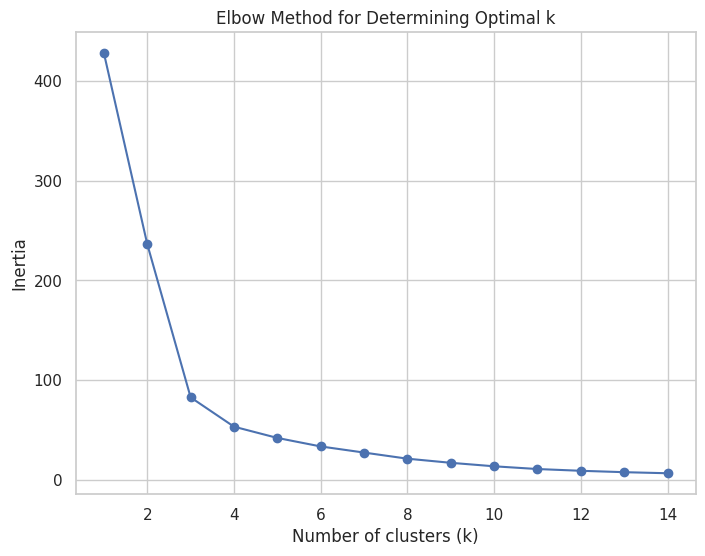

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


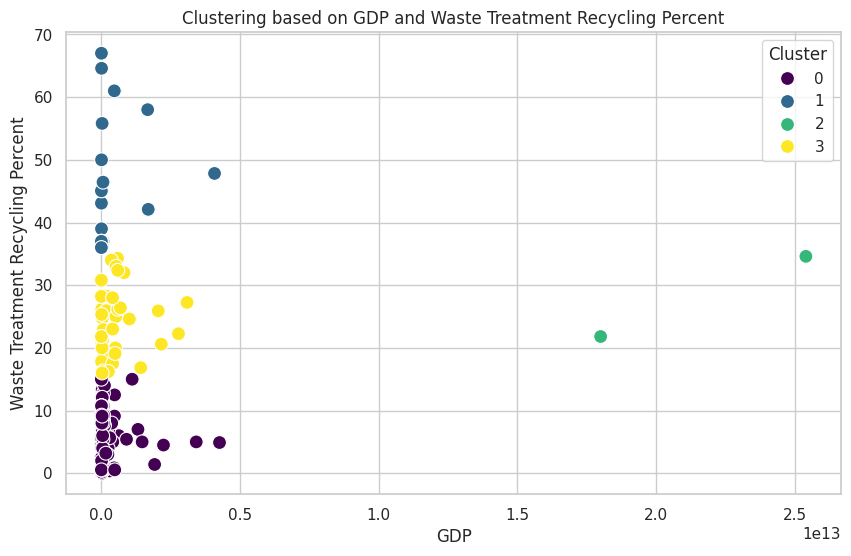

                  gdp  waste_treatment_recycling_percent
cluster                                                 
0        1.850864e+11                           6.813699
1        3.541064e+11                          44.825872
2        2.170000e+13                          28.206250
3        4.535391e+11                          24.288364

Countries in each cluster:

Cluster 0:
['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Argentina' 'Armenia'
 'Antigua and Barbuda' 'Azerbaijan' 'Burundi' 'Burkina Faso' 'Bangladesh'
 'Bahrain' 'Bahamas, The' 'Bosnia and Herzegovina' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Bhutan' 'Botswana'
 'Central African Republic' 'Chile' 'Côte d’Ivoire' 'Cameroon'
 'Congo, Dem. Rep.' 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Curacao'
 'Cyprus' 'Djibouti' 'Dominica' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Egypt, Arab Rep.' 'Eritrea' 'Ethiopia' 'Fiji' 'Gabon' 'Georgia' 'Ghana'
 'Guinea' 'Gambia, The' 'Guinea-Bissau' 'Equatorial Guinea' 'Grenada'
 'Guat

In [369]:
#K-means CLustering

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering
features = ['gdp', 'waste_treatment_recycling_percent']

# Handle missing values (if any)
data = data.dropna(subset=features)

# Remove Taiwan
data = data[data['country_name'] != 'Taiwan']

# Remove rows with GDP equal to 0
data = data[data['gdp'] != 0]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# DataFrame for scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal k')
plt.show()

# Fit the K-Means clustering model
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
data['cluster'] = kmeans.labels_

# # Set custom limits for GDP axis
# gdp_min = 0  # Define the minimum limit for GDP
# gdp_max = 100000  # Define the maximum limit for GDP

# Visualize the clusters using a scatter plot with custom limits for the x-axis (GDP)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['gdp'], y=data['waste_treatment_recycling_percent'], hue=data['cluster'], palette='viridis', s=100)
plt.title('Clustering based on GDP and Waste Treatment Recycling Percent')
plt.xlabel('GDP')
plt.ylabel('Waste Treatment Recycling Percent')

# # Set custom limits for the x-axis (GDP)
# plt.xlim(gdp_min, gdp_max)

plt.legend(title='Cluster')
plt.show()

# Summary statistics for each cluster
cluster_summary = data.groupby('cluster')[features].mean()
print(cluster_summary)

# Find which countries are in which clusters
print("\nCountries in each cluster:")

for cluster in range(k):
    print(f"\nCluster {cluster}:")
    cluster_countries = data[data['cluster'] == cluster]['country_name']
    print(cluster_countries.values)


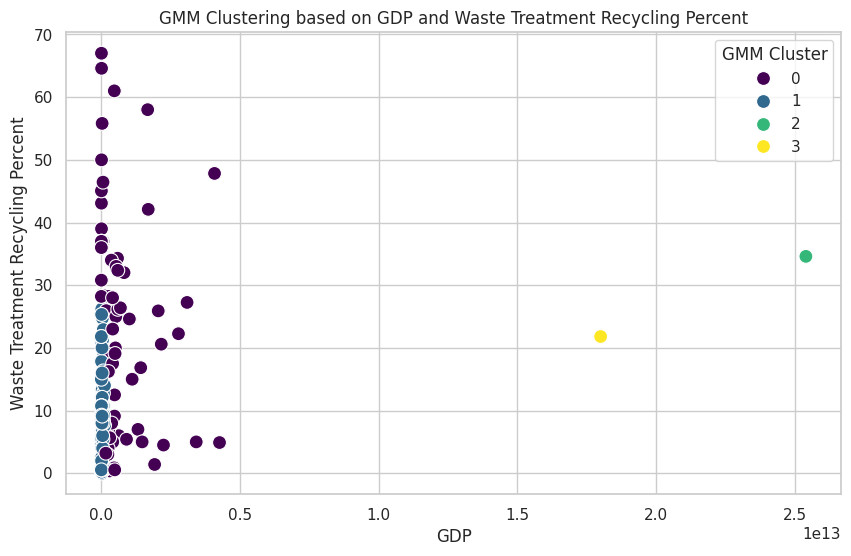

                      gdp  waste_treatment_recycling_percent
gmm_cluster                                                 
0            6.601665e+11                          25.091291
1            3.032994e+10                           9.111279
2            2.540000e+13                          34.600000
3            1.800000e+13                          21.812500

Countries in each GMM cluster:

GMM Cluster 0:
['Andorra' 'United Arab Emirates' 'Argentina' 'Australia' 'Austria'
 'Belgium' 'Bangladesh' 'Brazil' 'Canada' 'Switzerland' 'Channel Islands'
 'Chile' 'Colombia' 'Czech Republic' 'Germany' 'Denmark' 'Algeria'
 'Egypt, Arab Rep.' 'Spain' 'Finland' 'France' 'Faeroe Islands'
 'Micronesia, Fed. Sts.' 'United Kingdom' 'Greece' 'Greenland'
 'Hong Kong SAR, China' 'Hungary' 'Indonesia' 'Isle of Man' 'India'
 'Ireland' 'Iran, Islamic Rep.' 'Iraq' 'Iceland' 'Israel' 'Italy' 'Japan'
 'Kazakhstan' 'Cambodia' 'Kiribati' 'Korea, Rep.' 'Kuwait' 'Liechtenstein'
 'Luxembourg' 'Mexico' 'Marshall 

In [370]:
#Gaussian Mixture Model

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data here
# data = pd.read_csv('your_data.csv')  # Uncomment and modify to load your data

# Select relevant features for clustering
features = ['gdp', 'waste_treatment_recycling_percent']

# Handle missing values (if any)
data = data.dropna(subset=features)

# Remove rows with GDP equal to 0
data = data[data['gdp'] != 0]

# Remove Taiwan
data = data[data['country_name'] != 'Taiwan']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# DataFrame for scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features)

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
data['gmm_cluster'] = gmm.fit_predict(df_scaled)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['gdp'], y=data['waste_treatment_recycling_percent'], hue=data['gmm_cluster'], palette='viridis', s=100)
plt.title('GMM Clustering based on GDP and Waste Treatment Recycling Percent')
plt.xlabel('GDP')
plt.ylabel('Waste Treatment Recycling Percent')

plt.legend(title='GMM Cluster')
plt.show()

# Summary statistics for each cluster
gmm_cluster_summary = data.groupby('gmm_cluster')[features].mean()
print(gmm_cluster_summary)

# Find which countries are in which clusters
print("\nCountries in each GMM cluster:")

for cluster in range(4):
    print(f"\nGMM Cluster {cluster}:")
    cluster_countries = data[data['gmm_cluster'] == cluster]['country_name']
    print(cluster_countries.values)


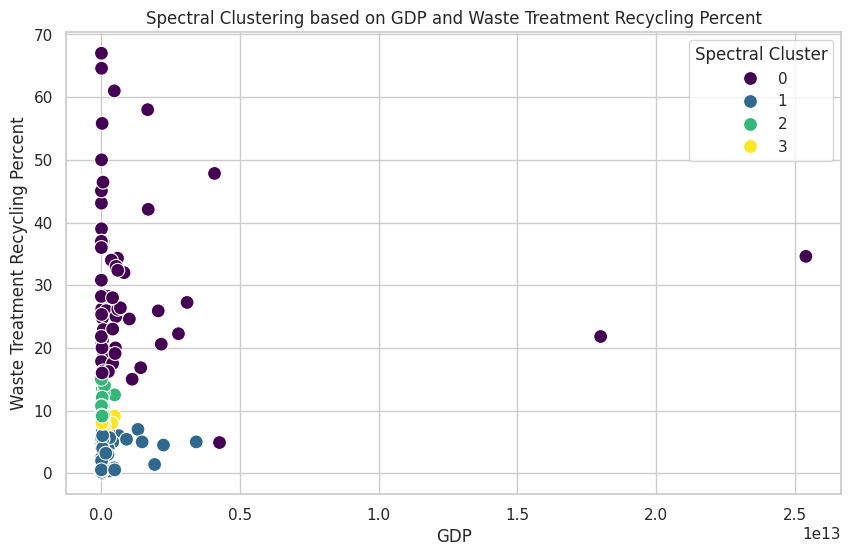

                           gdp  waste_treatment_recycling_percent
spectral_cluster                                                 
0                 1.026217e+12                          30.077104
1                 2.569631e+11                           3.399524
2                 4.031249e+10                          10.811449
3                 6.777211e+10                           8.291333

Countries in each Spectral cluster:

Spectral Cluster 0:
['Andorra' 'United Arab Emirates' 'American Samoa' 'Australia' 'Austria'
 'Belgium' 'Benin' 'Bulgaria' 'Belarus' 'Brunei Darussalam' 'Canada'
 'Switzerland' 'Channel Islands' 'China' 'Congo, Rep.' 'Colombia'
 'Cayman Islands' 'Czech Republic' 'Germany' 'Denmark' 'Spain' 'Estonia'
 'Finland' 'France' 'Faeroe Islands' 'Micronesia, Fed. Sts.'
 'United Kingdom' 'Greece' 'Greenland' 'Guam' 'Hong Kong SAR, China'
 'Croatia' 'Hungary' 'Isle of Man' 'Ireland' 'Iceland' 'Israel' 'Italy'
 'Japan' 'Cambodia' 'Kiribati' 'Korea, Rep.' 'Liechtenstein' 'L

In [371]:
#Spectral Clustering

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data here
# data = pd.read_csv('your_data.csv')  # Uncomment and modify to load your data

# Select relevant features for clustering
features = ['gdp', 'waste_treatment_recycling_percent']

# Handle missing values (if any)
data = data.dropna(subset=features)

# Remove rows with GDP equal to 0
data = data[data['gdp'] != 0]

# Remove Taiwan
data = data[data['country_name'] != 'Taiwan']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# DataFrame for scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features)

# Fit the Spectral Clustering model
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
data['spectral_cluster'] = spectral.fit_predict(df_scaled)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['gdp'], y=data['waste_treatment_recycling_percent'], hue=data['spectral_cluster'], palette='viridis', s=100)
plt.title('Spectral Clustering based on GDP and Waste Treatment Recycling Percent')
plt.xlabel('GDP')
plt.ylabel('Waste Treatment Recycling Percent')

plt.legend(title='Spectral Cluster')
plt.show()

# Summary statistics for each cluster
spectral_cluster_summary = data.groupby('spectral_cluster')[features].mean()
print(spectral_cluster_summary)

# Find which countries are in which clusters
print("\nCountries in each Spectral cluster:")

for cluster in range(4):
    print(f"\nSpectral Cluster {cluster}:")
    cluster_countries = data[data['spectral_cluster'] == cluster]['country_name']
    print(cluster_countries.values)